In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
one_M_return = pd.read_csv('1M return.csv')
two_M_return = pd.read_csv('2M return.csv')
thr_M_return = pd.read_csv('3M return.csv')
features = pd.read_csv('mergedfeatures.csv')
one_M_return = one_M_return[['date','stock_id','1M return']]
two_M_return = two_M_return[['date','stock_id','2M return']]
thr_M_return = thr_M_return[['date','stock_id','3M return']]

In [3]:
features = features[['stock_id','period_end','x_4','#goodfundcontaining','x_1','x_20','x_21','irisk']]
features

,stock_id,period_end,x_4,#goodfundcontaining,x_1,x_20,x_21,irisk
0,00130H105,2013-03-31,0.342075,2,11.0,362444.0,-228338.0,0.835830
1,00130H105,2013-06-30,0.798176,2,9.0,128058539.0,-1027487.0,0.839918
2,00130H105,2013-09-30,0.456100,1,9.0,-11942000.0,-1960657.0,0.837995
3,00130H105,2013-12-31,0.342075,1,10.0,40780660.0,2062600.0,0.832036
4,00130H105,2014-03-31,0.456100,2,10.0,1291060.0,266891.0,0.835726
...,...,...,...,...,...,...,...,...
11324,Y09827109,2018-09-30,0.453172,2,7.0,-134369000.0,-556364.0,0.858500
11325,Y09827109,2018-12-31,0.226586,1,4.0,-6487000.0,-29936.0,0.858119
11326,Y09827109,2019-03-31,0.226586,2,7.0,-936000.0,-21499.0,0.858006
11327,Y09827109,2019-06-30,0.075529,1,3.0,-6299000.0,-17523.0,0.861501


In [4]:
features.columns = ['stock_id','date','x_4','#goodfundcontaining','x_1','x_20','x_21','irisk']
features

,stock_id,date,x_4,#goodfundcontaining,x_1,x_20,x_21,irisk
0,00130H105,2013-03-31,0.342075,2,11.0,362444.0,-228338.0,0.835830
1,00130H105,2013-06-30,0.798176,2,9.0,128058539.0,-1027487.0,0.839918
2,00130H105,2013-09-30,0.456100,1,9.0,-11942000.0,-1960657.0,0.837995
3,00130H105,2013-12-31,0.342075,1,10.0,40780660.0,2062600.0,0.832036
4,00130H105,2014-03-31,0.456100,2,10.0,1291060.0,266891.0,0.835726
...,...,...,...,...,...,...,...,...
11324,Y09827109,2018-09-30,0.453172,2,7.0,-134369000.0,-556364.0,0.858500
11325,Y09827109,2018-12-31,0.226586,1,4.0,-6487000.0,-29936.0,0.858119
11326,Y09827109,2019-03-31,0.226586,2,7.0,-936000.0,-21499.0,0.858006
11327,Y09827109,2019-06-30,0.075529,1,3.0,-6299000.0,-17523.0,0.861501


In [5]:
features = features.set_index('date')
features.index = pd.DatetimeIndex.tz_localize(pd.to_datetime(features.index), tz = 'UTC')
features = features[features['stock_id']!= 'G8473T100']
features = features[features['stock_id']!= '00130H105']
features

,stock_id,x_4,#goodfundcontaining,x_1,x_20,x_21,irisk
date,,,,,,,
2013-03-31 00:00:00+00:00,00206R102,10.099573,108,200.0,1.107958e+07,-4504118.5,0.863539
2013-06-30 00:00:00+00:00,00206R102,12.873400,95,218.0,2.228786e+09,6715680.6,0.864603
2013-09-30 00:00:00+00:00,00206R102,7.539118,100,220.0,-8.516787e+07,488201.0,0.865126
2013-12-31 00:00:00+00:00,00206R102,10.953058,97,225.0,-2.874088e+07,-3271723.0,0.864683
2014-03-31 00:00:00+00:00,00206R102,5.832148,91,221.0,1.127081e+08,3547975.0,0.863553
...,...,...,...,...,...,...,...
2018-09-30 00:00:00+00:00,Y09827109,0.453172,2,7.0,-1.343690e+08,-556364.0,0.858500
2018-12-31 00:00:00+00:00,Y09827109,0.226586,1,4.0,-6.487000e+06,-29936.0,0.858119
2019-03-31 00:00:00+00:00,Y09827109,0.226586,2,7.0,-9.360000e+05,-21499.0,0.858006


In [6]:
x_4 = features[['stock_id','x_4']]
good_fund = features[['stock_id','#goodfundcontaining']]
x_1 = features[['stock_id','x_1']]
x_20 = features[['stock_id','x_20']]
x_21 = features[['stock_id','x_21']]
irisk = features[['stock_id','irisk']]

x_4_table = pd.pivot_table(x_4, values = 'x_4', index = 'date', columns = 'stock_id',aggfunc = numpy.sum)
good_fund_table = pd.pivot_table(good_fund, values = '#goodfundcontaining', index = 'date', columns = 'stock_id',aggfunc = numpy.sum)
x_1 = pd.pivot_table(x_1, values = 'x_1', index = 'date', columns = 'stock_id',aggfunc = numpy.sum)
x_20 = pd.pivot_table(x_20, values = 'x_20', index = 'date', columns = 'stock_id',aggfunc = numpy.sum)
x_21 = pd.pivot_table(x_21, values = 'x_21', index = 'date', columns = 'stock_id',aggfunc = numpy.sum)
irisk = pd.pivot_table(irisk, values = 'irisk', index = 'date', columns = 'stock_id',aggfunc = numpy.sum)
x_4_table

stock_id,00206R102,00287Y109,00507V109,00724F101,00751Y106,00846U101,00971T101,02079K107,02079K305,02209S103,...,G7S00T104,G96629103,G97822103,H1467J104,H2906T109,H84989104,N53745100,N6596X109,V7780T103,Y09827109
date,,,,,,,,,,,,,,,,,,,,,
2013-03-31 00:00:00+00:00,10.099573,4.189256,0.568990,1.435045,0.754458,0.542139,0.453172,NaN,NaN,1.991758,...,NaN,NaN,NaN,NaN,0.205761,0.981873,1.937046,0.453172,0.480110,NaN
2013-06-30 00:00:00+00:00,12.873400,7.540660,0.568990,1.435045,1.097394,1.429276,0.906344,NaN,NaN,5.906593,...,NaN,NaN,NaN,NaN,0.274348,1.586103,9.927361,0.755287,0.891632,NaN
2013-09-30 00:00:00+00:00,7.539118,3.548546,0.426743,0.906344,0.617284,0.542139,0.604230,NaN,NaN,2.815934,...,NaN,NaN,NaN,NaN,0.685871,0.604230,7.506053,0.981873,0.480110,NaN
2013-12-31 00:00:00+00:00,10.953058,5.470675,0.711238,0.906344,0.617284,0.739280,0.453172,NaN,NaN,3.159341,...,NaN,NaN,NaN,NaN,0.342936,0.830816,4.600484,0.755287,0.548697,NaN
2014-03-31 00:00:00+00:00,5.832148,3.893544,0.497866,1.510574,0.960219,0.689995,0.906344,NaN,NaN,2.678571,...,NaN,NaN,1.281419,NaN,0.342936,1.435045,5.326877,1.435045,0.617284,NaN
2014-06-30 00:00:00+00:00,10.953058,4.435683,0.711238,1.208459,0.548697,0.887137,0.453172,NaN,NaN,3.914835,...,NaN,NaN,0.689995,NaN,NaN,0.679758,5.326877,1.359517,0.411523,NaN
2014-09-30 00:00:00+00:00,9.174964,4.139970,0.426743,0.981873,1.165981,0.788566,0.604230,NaN,NaN,4.876374,...,0.522193,NaN,0.985707,NaN,NaN,0.377644,5.084746,0.981873,0.342936,NaN
2014-12-31 00:00:00+00:00,11.735420,6.456382,1.066856,1.661631,0.823045,0.640710,1.057402,NaN,NaN,3.434066,...,0.417755,NaN,1.182849,NaN,NaN,0.981873,4.842615,2.039275,1.028807,NaN
2015-03-31 00:00:00+00:00,9.957326,4.583539,0.924609,1.661631,0.891632,0.492854,0.830816,NaN,NaN,4.326923,...,0.626632,NaN,0.985707,NaN,NaN,0.679758,5.326877,2.794562,0.685871,NaN


In [7]:
x_4 = x_4_table.asfreq(freq = '1d', method = 'ffill')
x_4 = x_4.stack()
x_4 = pd.DataFrame(x_4)
x_4 = x_4.reset_index()

good_fund = good_fund_table.asfreq(freq = '1d', method = 'ffill')
good_fund= good_fund.stack()
good_fund = pd.DataFrame(good_fund)
good_fund = good_fund.reset_index()

x_1 = x_1.asfreq(freq = '1d', method = 'ffill')
x_1 = x_1.stack()
x_1 = pd.DataFrame(x_1)
x_1 = x_1.reset_index()

x_20 = x_20.asfreq(freq = '1d', method = 'ffill')
x_20 = x_20.stack()
x_20 = pd.DataFrame(x_20)
x_20 = x_20.reset_index()

x_21 = x_21.asfreq(freq = '1d', method = 'ffill')
x_21 = x_21.stack()
x_21 = pd.DataFrame(x_21)
x_21 = x_21.reset_index()

irisk = irisk.asfreq(freq = '1d', method = 'ffill')
irisk = irisk.stack()
irisk = pd.DataFrame(irisk)
irisk = irisk.reset_index()


# good_fund = good_fund_table.asfreq(freq = '1d', method = 'ffill').stack()
# x_1 = x_1.asfreq(freq = '1d', method = 'ffill').stack()
# x_20 = x_20.asfreq(freq = '1d', method = 'ffill').stack()
# x_21 = x_21.asfreq(freq = '1d', method = 'ffill').stack()
# irisk = irisk.asfreq(freq = '1d', method = 'ffill').stack()

# x_4 = pd.DataFrame(x_4).reset_index()
# good_fund= pd.DataFrame(good_fund).reset_index()
# x_1 = pd.DataFrame(x_1).reset_index()
# x_20 = pd.DataFrame(x_20).reset_index()
# x_21 = pd.DataFrame(x_21).reset_index()
# irisk= pd.DataFrame(irisk).reset_index()



# x_4 = pd.DataFrame(x_4)
# x_4 = x_4.reset_index()
# # x_4.columns = ['x_4']
# # x_4.index = x_4.set_index('date')
# # x_4.columns = ['stock_id','x_4']
# x_4.columns = ['date','stock_id','x_4']
x_21

,date,stock_id,0
0,2013-03-31 00:00:00+00:00,00206R102,-4504118.5
1,2013-03-31 00:00:00+00:00,00287Y109,30312879.0
2,2013-03-31 00:00:00+00:00,00507V109,966493.0
3,2013-03-31 00:00:00+00:00,00724F101,1490196.0
4,2013-03-31 00:00:00+00:00,00751Y106,-1890206.0
...,...,...,...
1047186,2020-03-31 00:00:00+00:00,H1467J104,6473900.0
1047187,2020-03-31 00:00:00+00:00,H2906T109,719254.0
1047188,2020-03-31 00:00:00+00:00,N53745100,10854700.0
1047189,2020-03-31 00:00:00+00:00,N6596X109,5012504.0


In [8]:
x_4.columns = ['date','stock_id','x_4']
good_fund.columns = ['date','stock_id','good_fund']
x_1.columns = ['date','stock_id','x_1']
x_20.columns = ['date','stock_id','x_20']
x_21.columns = ['date','stock_id','x_21']
irisk.columns = ['date','stock_id','irisk']

In [9]:
irisk

,date,stock_id,irisk
0,2013-03-31 00:00:00+00:00,00206R102,0.863539
1,2013-03-31 00:00:00+00:00,00287Y109,0.864739
2,2013-03-31 00:00:00+00:00,00507V109,0.837484
3,2013-03-31 00:00:00+00:00,00724F101,0.858204
4,2013-03-31 00:00:00+00:00,00751Y106,0.851930
...,...,...,...
1047186,2020-03-31 00:00:00+00:00,H1467J104,0.854293
1047187,2020-03-31 00:00:00+00:00,H2906T109,0.854293
1047188,2020-03-31 00:00:00+00:00,N53745100,0.884593
1047189,2020-03-31 00:00:00+00:00,N6596X109,0.847506


In [10]:
Result = pd.merge(x_4, good_fund, on = ['date','stock_id'])
Result = pd.merge(Result, x_1, on = ['date','stock_id'])
Result = pd.merge(Result, x_20, on = ['date','stock_id'])
Result = pd.merge(Result, x_21, on = ['date','stock_id'])
Result = pd.merge(Result, irisk, on = ['date','stock_id'])
Result

,date,stock_id,x_4,good_fund,x_1,x_20,x_21,irisk
0,2013-03-31 00:00:00+00:00,00206R102,10.099573,108.0,200.0,1.107958e+07,-4504118.5,0.863539
1,2013-03-31 00:00:00+00:00,00287Y109,4.189256,94.0,176.0,5.031445e+07,30312879.0,0.864739
2,2013-03-31 00:00:00+00:00,00507V109,0.568990,3.0,9.0,3.970000e+05,966493.0,0.837484
3,2013-03-31 00:00:00+00:00,00724F101,1.435045,17.0,30.0,-1.505903e+08,1490196.0,0.858204
4,2013-03-31 00:00:00+00:00,00751Y106,0.754458,8.0,17.0,1.540469e+07,-1890206.0,0.851930
...,...,...,...,...,...,...,...,...
1047186,2020-03-31 00:00:00+00:00,H1467J104,3.254275,23.0,132.0,7.234030e+08,6473900.0,0.854293
1047187,2020-03-31 00:00:00+00:00,H2906T109,0.411523,2.0,17.0,5.389900e+07,719254.0,0.854293
1047188,2020-03-31 00:00:00+00:00,N53745100,4.600484,18.0,66.0,5.386760e+08,10854700.0,0.884593
1047189,2020-03-31 00:00:00+00:00,N6596X109,1.435045,13.0,60.0,4.144554e+08,5012504.0,0.847506


In [11]:
# features = features.drop('x_4', axis = 1)
# features = pd.merge(x_4, features, on = ['date','stock_id'])
# features = features.drop('#goodfundcontaining', axis = 1)
# features = pd.merge(good_fund, features, on = ['date','stock_id'])

# features = features.drop('x_1', axis = 1)
# features = pd.merge(x_1, features, on = ['date','stock_id'])

# features = features.drop('x_20', axis = 1)
# features = pd.merge(x_20, features, on = ['date','stock_id'])

# features = features.drop('x_21', axis = 1)
# features = pd.merge(x_21, features, on = ['date','stock_id'])

# features = features.drop('irisk', axis = 1)
# features = pd.merge(irisk, features, on = ['date','stock_id'])

# # features.index = features.set_index('date')
# features

In [12]:
Result['date'] = pd.to_datetime(Result['date'])
Result = Result.set_index('date')
Result.index.unique()

DatetimeIndex(['2013-03-31 00:00:00+00:00', '2013-04-01 00:00:00+00:00',
               '2013-04-02 00:00:00+00:00', '2013-04-03 00:00:00+00:00',
               '2013-04-04 00:00:00+00:00', '2013-04-05 00:00:00+00:00',
               '2013-04-06 00:00:00+00:00', '2013-04-07 00:00:00+00:00',
               '2013-04-08 00:00:00+00:00', '2013-04-09 00:00:00+00:00',
               ...
               '2020-03-22 00:00:00+00:00', '2020-03-23 00:00:00+00:00',
               '2020-03-24 00:00:00+00:00', '2020-03-25 00:00:00+00:00',
               '2020-03-26 00:00:00+00:00', '2020-03-27 00:00:00+00:00',
               '2020-03-28 00:00:00+00:00', '2020-03-29 00:00:00+00:00',
               '2020-03-30 00:00:00+00:00', '2020-03-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=2558, freq=None)

In [13]:
one_M_return['date'] = pd.to_datetime(one_M_return['date'])
two_M_return['date'] = pd.to_datetime(two_M_return['date'])
thr_M_return['date'] = pd.to_datetime(thr_M_return['date'])

In [14]:
one_table = pd.pivot_table(one_M_return, values = '1M return', index = 'date', columns = 'stock_id',aggfunc = numpy.sum)
one_M_return = one_table.asfreq(freq = '1d', method = 'ffill').stack()
one_M_return = pd.DataFrame(one_M_return).reset_index()
one_M_return.columns = ['date','stock_id','1M return']
one_M_return.index= one_M_return.set_index('date')
# one_M_return.index = pd.to_datetime(one_M_return.index)

In [15]:
two_table = pd.pivot_table(two_M_return, values = '2M return', index = 'date', columns = 'stock_id',aggfunc = numpy.sum)
two_M_return = two_table.asfreq(freq = '1d', method = 'ffill').stack()
two_M_return = pd.DataFrame(two_M_return).reset_index()
two_M_return.columns = ['date','stock_id','2M return']
two_M_return

,date,stock_id,2M return
0,2013-04-01 00:00:00+00:00,18383Q747,0.214619
1,2013-04-01 00:00:00+00:00,25459W151,4.656335
2,2013-04-01 00:00:00+00:00,25459W318,-0.990158
3,2013-04-01 00:00:00+00:00,268461852,-0.196000
4,2013-04-01 00:00:00+00:00,303046106,-0.125000
...,...,...,...
47475326,2020-05-28 00:00:00+00:00,Y88965101,0.832117
47475327,2020-05-28 00:00:00+00:00,Y8897Y164,-0.591774
47475328,2020-05-28 00:00:00+00:00,Y95308105,0.215640
47475329,2020-05-28 00:00:00+00:00,Y9891F102,-0.139781


In [16]:
thr_table = pd.pivot_table(thr_M_return, values = '3M return', index = 'date', columns = 'stock_id',aggfunc = numpy.sum)
thr_M_return = thr_table.asfreq(freq = '1d', method = 'ffill').stack()
thr_M_return = pd.DataFrame(thr_M_return).reset_index()
thr_M_return.columns = ['date','stock_id','3M return']
thr_M_return

,date,stock_id,3M return
0,2013-05-01 00:00:00+00:00,18383Q747,0.412476
1,2013-05-01 00:00:00+00:00,25459W151,4.360073
2,2013-05-01 00:00:00+00:00,25459W318,-0.990158
3,2013-05-01 00:00:00+00:00,268461852,-0.196000
4,2013-05-01 00:00:00+00:00,303046106,-0.125000
...,...,...,...
45487244,2020-05-29 00:00:00+00:00,Y88965101,3.355618
45487245,2020-05-29 00:00:00+00:00,Y8897Y164,-2.439909
45487246,2020-05-29 00:00:00+00:00,Y95308105,1.248289
45487247,2020-05-29 00:00:00+00:00,Y9891F102,-0.616277


In [17]:
# try1 = pd.merge(one_M_return, features[['stock_id', 'x_4']], on = ['date','stock_id'], how = 'right').fillna(method = 'ffill')
# try1

In [18]:
Result = pd.merge(Result, one_M_return, on = ['date','stock_id'])
# features = pd.merge(two_M_return, features, on = ['date','stock_id'])
# features = pd.merge(thr_M_return, features, on = ['date','stock_id'])
# features
Result

,date,stock_id,x_4,good_fund,x_1,x_20,x_21,irisk,1M return
0,2013-03-31 00:00:00+00:00,00206R102,10.099573,108.0,200.0,1.107958e+07,-4504118.5,0.863539,0.021721
1,2013-03-31 00:00:00+00:00,00287Y109,4.189256,94.0,176.0,5.031445e+07,30312879.0,0.864739,0.104550
2,2013-03-31 00:00:00+00:00,00507V109,0.568990,3.0,9.0,3.970000e+05,966493.0,0.837484,0.019237
3,2013-03-31 00:00:00+00:00,00724F101,1.435045,17.0,30.0,-1.505903e+08,1490196.0,0.858204,0.106970
4,2013-03-31 00:00:00+00:00,00751Y106,0.754458,8.0,17.0,1.540469e+07,-1890206.0,0.851930,0.082657
...,...,...,...,...,...,...,...,...,...
996692,2020-03-31 00:00:00+00:00,H1467J104,3.254275,23.0,132.0,7.234030e+08,6473900.0,0.854293,-0.277796
996693,2020-03-31 00:00:00+00:00,H2906T109,0.411523,2.0,17.0,5.389900e+07,719254.0,0.854293,-0.176411
996694,2020-03-31 00:00:00+00:00,N53745100,4.600484,18.0,66.0,5.386760e+08,10854700.0,0.884593,-0.303244
996695,2020-03-31 00:00:00+00:00,N6596X109,1.435045,13.0,60.0,4.144554e+08,5012504.0,0.847506,-0.290823


In [19]:
Result = pd.merge(Result, two_M_return, on = ['date','stock_id'])
Result = pd.merge(Result, thr_M_return, on = ['date','stock_id'])
Result

,date,stock_id,x_4,good_fund,x_1,x_20,x_21,irisk,1M return,2M return,3M return
0,2013-05-02 00:00:00+00:00,00206R102,10.099573,108.0,200.0,1.107958e+07,-4504118.5,0.863539,-0.000266,0.057730,0.073143
1,2013-05-02 00:00:00+00:00,00287Y109,4.189256,94.0,176.0,5.031445e+07,30312879.0,0.864739,0.080570,0.225121,0.252563
2,2013-05-02 00:00:00+00:00,00507V109,0.568990,3.0,9.0,3.970000e+05,966493.0,0.837484,0.008147,0.265236,0.356784
3,2013-05-02 00:00:00+00:00,00724F101,1.435045,17.0,30.0,-1.505903e+08,1490196.0,0.858204,0.042080,0.166145,0.191706
4,2013-05-02 00:00:00+00:00,00751Y106,0.754458,8.0,17.0,1.540469e+07,-1890206.0,0.851930,0.021248,0.144990,0.166920
...,...,...,...,...,...,...,...,...,...,...,...
946453,2020-03-31 00:00:00+00:00,H1467J104,3.254275,23.0,132.0,7.234030e+08,6473900.0,0.854293,-0.277796,-0.282475,-0.287151
946454,2020-03-31 00:00:00+00:00,H2906T109,0.411523,2.0,17.0,5.389900e+07,719254.0,0.854293,-0.176411,-0.231652,-0.250764
946455,2020-03-31 00:00:00+00:00,N53745100,4.600484,18.0,66.0,5.386760e+08,10854700.0,0.884593,-0.303244,-0.474704,-0.477525
946456,2020-03-31 00:00:00+00:00,N6596X109,1.435045,13.0,60.0,4.144554e+08,5012504.0,0.847506,-0.290823,-0.348342,-0.307555


In [20]:
Result= Result.reset_index()
Result
# Result.index

,index,date,stock_id,x_4,good_fund,x_1,x_20,x_21,irisk,1M return,2M return,3M return
0,0,2013-05-02 00:00:00+00:00,00206R102,10.099573,108.0,200.0,1.107958e+07,-4504118.5,0.863539,-0.000266,0.057730,0.073143
1,1,2013-05-02 00:00:00+00:00,00287Y109,4.189256,94.0,176.0,5.031445e+07,30312879.0,0.864739,0.080570,0.225121,0.252563
2,2,2013-05-02 00:00:00+00:00,00507V109,0.568990,3.0,9.0,3.970000e+05,966493.0,0.837484,0.008147,0.265236,0.356784
3,3,2013-05-02 00:00:00+00:00,00724F101,1.435045,17.0,30.0,-1.505903e+08,1490196.0,0.858204,0.042080,0.166145,0.191706
4,4,2013-05-02 00:00:00+00:00,00751Y106,0.754458,8.0,17.0,1.540469e+07,-1890206.0,0.851930,0.021248,0.144990,0.166920
...,...,...,...,...,...,...,...,...,...,...,...,...
946453,946453,2020-03-31 00:00:00+00:00,H1467J104,3.254275,23.0,132.0,7.234030e+08,6473900.0,0.854293,-0.277796,-0.282475,-0.287151
946454,946454,2020-03-31 00:00:00+00:00,H2906T109,0.411523,2.0,17.0,5.389900e+07,719254.0,0.854293,-0.176411,-0.231652,-0.250764
946455,946455,2020-03-31 00:00:00+00:00,N53745100,4.600484,18.0,66.0,5.386760e+08,10854700.0,0.884593,-0.303244,-0.474704,-0.477525
946456,946456,2020-03-31 00:00:00+00:00,N6596X109,1.435045,13.0,60.0,4.144554e+08,5012504.0,0.847506,-0.290823,-0.348342,-0.307555


In [21]:
Result = Result[['date', 'stock_id','x_4','good_fund','x_1','x_20','x_21','irisk','1M return','2M return','3M return']]
Result

,date,stock_id,x_4,good_fund,x_1,x_20,x_21,irisk,1M return,2M return,3M return
0,2013-05-02 00:00:00+00:00,00206R102,10.099573,108.0,200.0,1.107958e+07,-4504118.5,0.863539,-0.000266,0.057730,0.073143
1,2013-05-02 00:00:00+00:00,00287Y109,4.189256,94.0,176.0,5.031445e+07,30312879.0,0.864739,0.080570,0.225121,0.252563
2,2013-05-02 00:00:00+00:00,00507V109,0.568990,3.0,9.0,3.970000e+05,966493.0,0.837484,0.008147,0.265236,0.356784
3,2013-05-02 00:00:00+00:00,00724F101,1.435045,17.0,30.0,-1.505903e+08,1490196.0,0.858204,0.042080,0.166145,0.191706
4,2013-05-02 00:00:00+00:00,00751Y106,0.754458,8.0,17.0,1.540469e+07,-1890206.0,0.851930,0.021248,0.144990,0.166920
...,...,...,...,...,...,...,...,...,...,...,...
946453,2020-03-31 00:00:00+00:00,H1467J104,3.254275,23.0,132.0,7.234030e+08,6473900.0,0.854293,-0.277796,-0.282475,-0.287151
946454,2020-03-31 00:00:00+00:00,H2906T109,0.411523,2.0,17.0,5.389900e+07,719254.0,0.854293,-0.176411,-0.231652,-0.250764
946455,2020-03-31 00:00:00+00:00,N53745100,4.600484,18.0,66.0,5.386760e+08,10854700.0,0.884593,-0.303244,-0.474704,-0.477525
946456,2020-03-31 00:00:00+00:00,N6596X109,1.435045,13.0,60.0,4.144554e+08,5012504.0,0.847506,-0.290823,-0.348342,-0.307555


In [22]:
Result['date'] = pd.to_datetime(Result['date'])
# Result.index = Result.set_index('date')
Result

/Users/angli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,stock_id,x_4,good_fund,x_1,x_20,x_21,irisk,1M return,2M return,3M return
0,2013-05-02 00:00:00+00:00,00206R102,10.099573,108.0,200.0,1.107958e+07,-4504118.5,0.863539,-0.000266,0.057730,0.073143
1,2013-05-02 00:00:00+00:00,00287Y109,4.189256,94.0,176.0,5.031445e+07,30312879.0,0.864739,0.080570,0.225121,0.252563
2,2013-05-02 00:00:00+00:00,00507V109,0.568990,3.0,9.0,3.970000e+05,966493.0,0.837484,0.008147,0.265236,0.356784
3,2013-05-02 00:00:00+00:00,00724F101,1.435045,17.0,30.0,-1.505903e+08,1490196.0,0.858204,0.042080,0.166145,0.191706
4,2013-05-02 00:00:00+00:00,00751Y106,0.754458,8.0,17.0,1.540469e+07,-1890206.0,0.851930,0.021248,0.144990,0.166920
...,...,...,...,...,...,...,...,...,...,...,...
946453,2020-03-31 00:00:00+00:00,H1467J104,3.254275,23.0,132.0,7.234030e+08,6473900.0,0.854293,-0.277796,-0.282475,-0.287151
946454,2020-03-31 00:00:00+00:00,H2906T109,0.411523,2.0,17.0,5.389900e+07,719254.0,0.854293,-0.176411,-0.231652,-0.250764
946455,2020-03-31 00:00:00+00:00,N53745100,4.600484,18.0,66.0,5.386760e+08,10854700.0,0.884593,-0.303244,-0.474704,-0.477525
946456,2020-03-31 00:00:00+00:00,N6596X109,1.435045,13.0,60.0,4.144554e+08,5012504.0,0.847506,-0.290823,-0.348342,-0.307555


In [23]:
Result = Result.set_index(['date'])
Result

,stock_id,x_4,good_fund,x_1,x_20,x_21,irisk,1M return,2M return,3M return
date,,,,,,,,,,
2013-05-02 00:00:00+00:00,00206R102,10.099573,108.0,200.0,1.107958e+07,-4504118.5,0.863539,-0.000266,0.057730,0.073143
2013-05-02 00:00:00+00:00,00287Y109,4.189256,94.0,176.0,5.031445e+07,30312879.0,0.864739,0.080570,0.225121,0.252563
2013-05-02 00:00:00+00:00,00507V109,0.568990,3.0,9.0,3.970000e+05,966493.0,0.837484,0.008147,0.265236,0.356784
2013-05-02 00:00:00+00:00,00724F101,1.435045,17.0,30.0,-1.505903e+08,1490196.0,0.858204,0.042080,0.166145,0.191706
2013-05-02 00:00:00+00:00,00751Y106,0.754458,8.0,17.0,1.540469e+07,-1890206.0,0.851930,0.021248,0.144990,0.166920
...,...,...,...,...,...,...,...,...,...,...
2020-03-31 00:00:00+00:00,H1467J104,3.254275,23.0,132.0,7.234030e+08,6473900.0,0.854293,-0.277796,-0.282475,-0.287151
2020-03-31 00:00:00+00:00,H2906T109,0.411523,2.0,17.0,5.389900e+07,719254.0,0.854293,-0.176411,-0.231652,-0.250764
2020-03-31 00:00:00+00:00,N53745100,4.600484,18.0,66.0,5.386760e+08,10854700.0,0.884593,-0.303244,-0.474704,-0.477525


In [24]:
pred_y = Result[['stock_id','3M return']]
pred_y.index = pred_y.index-pd.DateOffset(months = 3)
pred_y.columns = ['stock_id','return']

In [25]:
pred_y

,stock_id,return
date,,
2013-02-02 00:00:00+00:00,00206R102,0.073143
2013-02-02 00:00:00+00:00,00287Y109,0.252563
2013-02-02 00:00:00+00:00,00507V109,0.356784
2013-02-02 00:00:00+00:00,00724F101,0.191706
2013-02-02 00:00:00+00:00,00751Y106,0.166920
...,...,...
2019-12-31 00:00:00+00:00,H1467J104,-0.287151
2019-12-31 00:00:00+00:00,H2906T109,-0.250764
2019-12-31 00:00:00+00:00,N53745100,-0.477525


In [26]:
Result = pd.merge(Result, pred_y, on = ['stock_id','date'])
Result

,stock_id,x_4,good_fund,x_1,x_20,x_21,irisk,1M return,2M return,3M return,return
date,,,,,,,,,,,
2013-05-02 00:00:00+00:00,00206R102,10.099573,108.0,200.0,1.107958e+07,-4504118.5,0.863539,-0.000266,0.057730,0.073143,-0.047911
2013-05-02 00:00:00+00:00,00287Y109,4.189256,94.0,176.0,5.031445e+07,30312879.0,0.864739,0.080570,0.225121,0.252563,0.113240
2013-05-02 00:00:00+00:00,00507V109,0.568990,3.0,9.0,3.970000e+05,966493.0,0.837484,0.008147,0.265236,0.356784,0.227427
2013-05-02 00:00:00+00:00,00724F101,1.435045,17.0,30.0,-1.505903e+08,1490196.0,0.858204,0.042080,0.166145,0.191706,0.082221
2013-05-02 00:00:00+00:00,00751Y106,0.754458,8.0,17.0,1.540469e+07,-1890206.0,0.851930,0.021248,0.144990,0.166920,0.007727
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 00:00:00+00:00,H1467J104,3.530061,26.0,133.0,6.795986e+07,-62880.0,0.862991,0.024592,-0.037971,-0.006207,-0.287151
2019-12-31 00:00:00+00:00,H2906T109,0.411523,2.0,13.0,1.093300e+07,91411.0,0.865971,0.003872,0.156571,0.200809,-0.250764
2019-12-31 00:00:00+00:00,N53745100,8.716707,22.0,74.0,-3.863298e+08,-4703522.0,0.849991,-0.007509,0.051637,0.215947,-0.477525


In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
begin_date = datetime.datetime(2013,1,30)
end_date = datetime.datetime(2020,1,1)
qtr_list = pd.date_range(begin_date, end_date, freq="BQS")
qtr_list

DatetimeIndex(['2013-04-01', '2013-07-01', '2013-10-01', '2014-01-01',
               '2014-04-01', '2014-07-01', '2014-10-01', '2015-01-01',
               '2015-04-01', '2015-07-01', '2015-10-01', '2016-01-01',
               '2016-04-01', '2016-07-01', '2016-10-03', '2017-01-02',
               '2017-04-03', '2017-07-03', '2017-10-02', '2018-01-01',
               '2018-04-02', '2018-07-02', '2018-10-01', '2019-01-01',
               '2019-04-01', '2019-07-01', '2019-10-01', '2020-01-01'],
              dtype='datetime64[ns]', freq='BQS-JAN')

In [29]:
def rolling_pred(train_feature, train_return, test_feature, test_return):
    '''
    This function suppose to use train_feature, train_return to generate a model and use test_feature to predict
    the test_returns. 
    Ouput:
        test_return
    '''
    rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
    rf.fit(train_feature, train_return)
    test_predict = rf.predict(test_feature)
    errors = abs(test_predict - test_return)
    print('mean square error: ', round(numpy.mean(errors**2), 5), 'degrees')
    return test_predict

In [30]:
feature_list = ['3M return','2M return','1M return','irisk','x_21','x_20','x_1','good_fund','x_4']
predictions = numpy.array([])
for i in range(len(qtr_list)-6):
    train = Result[qtr_list[i]:qtr_list[i+5]]
    train_f = train[feature_list]
    train_r = train['return']
    test = Result[qtr_list[i+5]:qtr_list[i+6]]
    test_f = test[feature_list]
    test_r = test['return']
    predictions = numpy.concatenate((predictions, rolling_pred(train_f, train_r, test_f, test_r)))

mean square error:  0.01485 degrees
mean square error:  0.01447 degrees
mean square error:  0.01285 degrees
mean square error:  0.02214 degrees
mean square error:  0.01601 degrees
mean square error:  0.02743 degrees
mean square error:  0.03207 degrees
mean square error:  0.01868 degrees
mean square error:  0.02689 degrees
mean square error:  0.02036 degrees
mean square error:  0.01465 degrees
mean square error:  0.01227 degrees
mean square error:  0.01563 degrees
mean square error:  0.01656 degrees
mean square error:  0.01911 degrees
mean square error:  0.01593 degrees
mean square error:  0.02909 degrees
mean square error:  0.01821 degrees
mean square error:  0.04351 degrees
mean square error:  0.02305 degrees
mean square error:  0.02115 degrees
mean square error:  0.04569 degrees


In [31]:
len(predictions)

743008

In [32]:
Result = Result[qtr_list[5]:]
# Result['pred'] = predictions
len(Result)

736786

In [34]:
predictions = predictions[-len(Result):]
Result['pred'] = predictions
Result

/Users/angli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,stock_id,x_4,good_fund,x_1,x_20,x_21,irisk,1M return,2M return,3M return,return,pred
date,,,,,,,,,,,,
2014-07-02 00:00:00+00:00,00206R102,10.953058,98.0,230.0,-189776481.0,-6092398.0,0.865156,0.006490,0.008482,0.098666,-0.013262,0.139817
2014-07-02 00:00:00+00:00,00287Y109,4.435683,85.0,195.0,68274221.0,-2347380.0,0.865707,0.073130,0.089426,0.115498,0.046537,0.232972
2014-07-02 00:00:00+00:00,00507V109,0.711238,2.0,17.0,3736000.0,-534033.0,0.835238,0.089719,0.081588,0.121228,-0.010427,0.020652
2014-07-02 00:00:00+00:00,00724F101,1.208459,13.0,35.0,478904000.0,2668627.0,0.860682,0.125619,0.111179,0.029748,0.037438,0.059612
2014-07-02 00:00:00+00:00,00751Y106,0.548697,9.0,18.0,-41543000.0,-568928.0,0.862083,0.078573,0.058253,0.067584,0.068290,0.064383
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 00:00:00+00:00,H1467J104,3.530061,26.0,133.0,67959860.0,-62880.0,0.862991,0.024592,-0.037971,-0.006207,-0.287151,0.019919
2019-12-31 00:00:00+00:00,H2906T109,0.411523,2.0,13.0,10933000.0,91411.0,0.865971,0.003872,0.156571,0.200809,-0.250764,0.028433
2019-12-31 00:00:00+00:00,N53745100,8.716707,22.0,74.0,-386329764.0,-4703522.0,0.849991,-0.007509,0.051637,0.215947,-0.477525,-0.008264


In [36]:
pred_factor = Result[['stock_id','pred']]
pred_factor = pd.pivot_table(pred_factor, values = 'pred', index = ['date'], columns = 'stock_id', aggfunc = numpy.mean)
pred_factor = pred_factor.asfreq(freq = '1d', method = 'ffill').stack()
pred_factor

date                       stock_id 
2014-07-02 00:00:00+00:00  00206R102    0.139817
                           00287Y109    0.232972
                           00507V109    0.020652
                           00724F101    0.059612
                           00751Y106    0.064383
                                          ...   
2019-12-31 00:00:00+00:00  H1467J104    0.019919
                           H2906T109    0.028433
                           N53745100   -0.008264
                           N6596X109    0.068948
                           V7780T103    0.103889
Length: 816650, dtype: float64

In [51]:
price_table = pd.read_csv('prices_from_2013.csv')
price_table

,date,stock_id,exchange,ticker,valume,open,high,low,close
0,2013-12-23 00:00:00+00:00,001038108,PK,AFAP,0,273.2500,273.2500,273.2500,273.2500
1,2015-04-15 00:00:00+00:00,87243T100,PK,CBDG,0,0.8000,0.8000,0.8000,0.8000
2,2013-10-17 00:00:00+00:00,925490203,O,VRTA,0,6.1600,6.3200,6.1600,6.2400
3,2014-02-14 00:00:00+00:00,83607W102,PK,SHSO,0,0.0001,0.0001,0.0001,0.0001
4,2013-05-01 00:00:00+00:00,G0440M128,PK,AQPBF,0,0.6900,0.6900,0.6900,0.6900
...,...,...,...,...,...,...,...,...,...
35410510,2020-05-22 00:00:00+00:00,98979F107,A,ZOM,14608310,0.2200,0.2205,0.2000,0.2148
35410511,2020-05-26 00:00:00+00:00,98979F107,A,ZOM,13622890,0.2101,0.2200,0.2050,0.2108
35410512,2020-05-27 00:00:00+00:00,98979F107,A,ZOM,220125900,0.1460,0.1652,0.1438,0.1632
35410513,2020-05-28 00:00:00+00:00,98979F107,A,ZOM,65927280,0.1705,0.1730,0.1550,0.1594


In [52]:
price_table = price_table[['date','stock_id','close']]
price_table

,date,stock_id,close
0,2013-12-23 00:00:00+00:00,001038108,273.2500
1,2015-04-15 00:00:00+00:00,87243T100,0.8000
2,2013-10-17 00:00:00+00:00,925490203,6.2400
3,2014-02-14 00:00:00+00:00,83607W102,0.0001
4,2013-05-01 00:00:00+00:00,G0440M128,0.6900
...,...,...,...
35410510,2020-05-22 00:00:00+00:00,98979F107,0.2148
35410511,2020-05-26 00:00:00+00:00,98979F107,0.2108
35410512,2020-05-27 00:00:00+00:00,98979F107,0.1632
35410513,2020-05-28 00:00:00+00:00,98979F107,0.1594


In [53]:
price_table = price_table.set_index(['date'])
price_table.index = pd.to_datetime(price_table.index)
price_table

,stock_id,close
date,,
2013-12-23 00:00:00+00:00,001038108,273.2500
2015-04-15 00:00:00+00:00,87243T100,0.8000
2013-10-17 00:00:00+00:00,925490203,6.2400
2014-02-14 00:00:00+00:00,83607W102,0.0001
2013-05-01 00:00:00+00:00,G0440M128,0.6900
...,...,...
2020-05-22 00:00:00+00:00,98979F107,0.2148
2020-05-26 00:00:00+00:00,98979F107,0.2108
2020-05-27 00:00:00+00:00,98979F107,0.1632


In [54]:

price_table = pd.pivot_table(price_table, values = 'close',index = ['date'],columns = 'stock_id',aggfunc=numpy.sum)
price_table

stock_id,14056V29,34958R19,46629U18,92549022,000144899,000279208,000303107,000304105,000307108,000360206,...,Y9013V159,Y9361F111,Y9381W102,Y9384M101,Y95308105,Y9532S109,Y9723Q102,Y9891F102,Y989DF109,Y9T10P105
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02 00:00:00+00:00,NaN,8.7950,4.7000,NaN,NaN,0.33,NaN,3.608,NaN,9.45333,...,0.4,6.41,11.05,NaN,NaN,1.46,0.195,0.77500,NaN,NaN
2013-01-03 00:00:00+00:00,NaN,8.7617,4.6000,NaN,NaN,0.33,NaN,3.550,NaN,9.61778,...,0.4,6.41,11.05,NaN,NaN,1.46,0.195,0.77500,NaN,NaN
2013-01-04 00:00:00+00:00,NaN,8.8100,4.4500,NaN,NaN,0.33,NaN,3.690,NaN,9.66667,...,0.4,6.41,11.05,NaN,NaN,1.46,0.195,0.77500,NaN,NaN
2013-01-07 00:00:00+00:00,NaN,9.3610,4.4019,NaN,NaN,0.33,NaN,3.692,NaN,9.56000,...,0.4,6.41,11.05,NaN,NaN,1.46,0.195,0.77500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-22 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,5.060,0.255,51.70000,...,NaN,NaN,NaN,NaN,11.08,NaN,NaN,0.74000,2.25,NaN
2020-05-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,5.228,0.285,54.78000,...,NaN,NaN,NaN,NaN,10.70,NaN,NaN,0.74000,2.25,NaN
2020-05-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,5.172,0.320,54.98000,...,NaN,NaN,NaN,NaN,10.41,NaN,NaN,0.66925,2.25,NaN


In [55]:

import alphalens as al
pred_al_fact = al.utils.get_clean_factor_and_forward_returns(pred_factor, price_table,
                                              groupby=None,
                                              binning_by_group=False,
                                              quantiles=5,
                                              bins=None,
                                              periods=(20, 60,120,240),
                                              filter_zscore=20,
                                              groupby_labels=None,
                                              max_loss=0.9,
                                              zero_aware=False)
pred_al_fact

Dropped 37.2% entries from factor data: 37.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 90.0%, not exceeded: OK!


28D       84D      168D      336D  \
date                      asset                                               
2014-07-02 00:00:00+00:00 00206R102  0.019344 -0.007569 -0.084104 -0.017942   
                          00287Y109 -0.075030  0.016176  0.145586  0.153158   
                          00507V109  0.018692 -0.056075 -0.124611  0.155318   
                          00724F101 -0.011957 -0.051264  0.016974  0.101292   
                          00751Y106 -0.074860 -0.027039  0.188454  0.165959   
...                                       ...       ...       ...       ...   
2019-06-17 00:00:00+00:00 H2906T109  0.013757  0.052526  0.195598  0.127689   
                          H84989104 -0.004532  0.061132  0.007628 -0.101813   
                          N53745100  0.024385  0.000000  0.070820 -0.256096   
                          N6596X109  0.081494  0.226310  0.305574  0.071349   
                          V7780T103 -0.062679 -0.068570 -0.009901 -0.575567   

                                       factor  factor_quantile  
date                      asset                                 
2014-07-02 00:00:00+00:00 00206R102  0.139817                5  
                          00287Y109  0.232972                5  
                          00507V109  0.020652                2  
                          00724F101  0.059612                3  
                          00751Y106  0.064383                4  
...                                       ...              ...  
2019-06-17 00:00:00+00:00 H2906T109 -0.109888                1  
                          H84989104 -0.030495                2  
                          N53745100 -0.024865                2  
                          N6596X109 -0.024925                2  
                          V7780T103 -0.092668                1  

[512510 rows x 6 columns]

In [57]:
pred_al_fact = pred_al_fact.dropna()

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.806577,0.072759,-0.073047,0.065361,103098,20.116290
2,-0.225990,0.124430,-0.001933,0.039342,102258,19.952391
3,-0.156484,0.216781,0.036268,0.036302,102170,19.935221
4,-0.103693,0.338507,0.074742,0.037285,102248,19.950440
5,-0.034314,1.626989,0.156414,0.087612,102736,20.045658


Returns Analysis


,28D,84D,168D,336D
Ann. alpha,-0.000,-0.001,0.001,0.001
beta,0.005,0.020,-0.008,-0.012
Mean Period Wise Return Top Quantile (bps),-3.589,-2.349,-1.346,-0.454
Mean Period Wise Return Bottom Quantile (bps),1.630,-3.289,-1.936,-1.869
Mean Period Wise Spread (bps),-5.219,0.934,0.565,1.396


/Users/angli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,
/Users/angli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,
/Users/angli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,
/Users/angli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,
/Users/angli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarn

<Figure size 432x288 with 0 Axes>

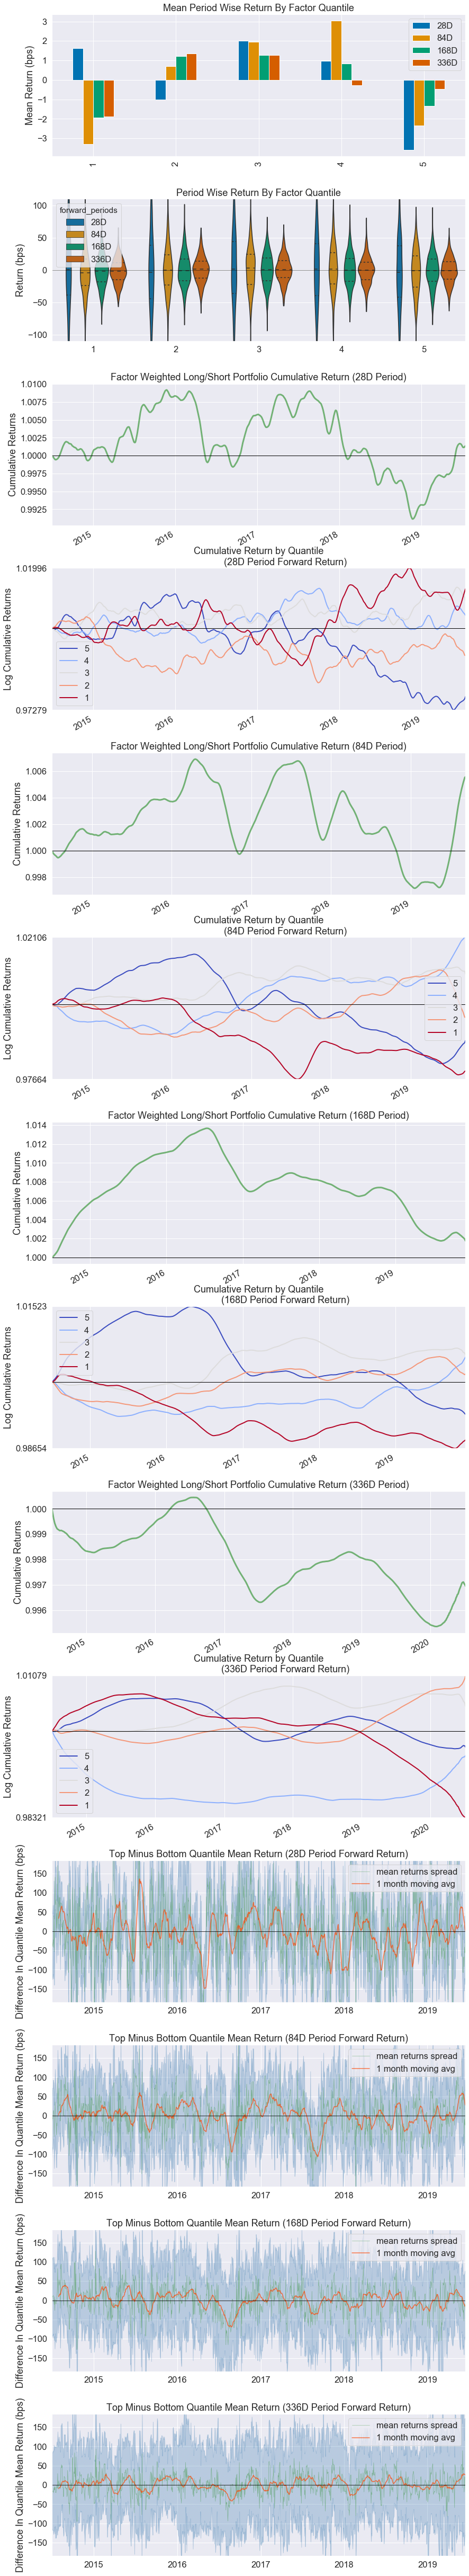

Information Analysis


,28D,84D,168D,336D
IC Mean,-0.001,0.002,0.000,-0.003
IC Std.,0.048,0.046,0.043,0.046
Risk-Adjusted IC,-0.017,0.040,0.001,-0.057
t-stat(IC),-0.619,1.431,0.023,-2.035
p-value(IC),0.536,0.153,0.982,0.042
IC Skew,0.157,0.126,-0.005,-0.016
IC Kurtosis,0.257,0.412,0.115,-0.135


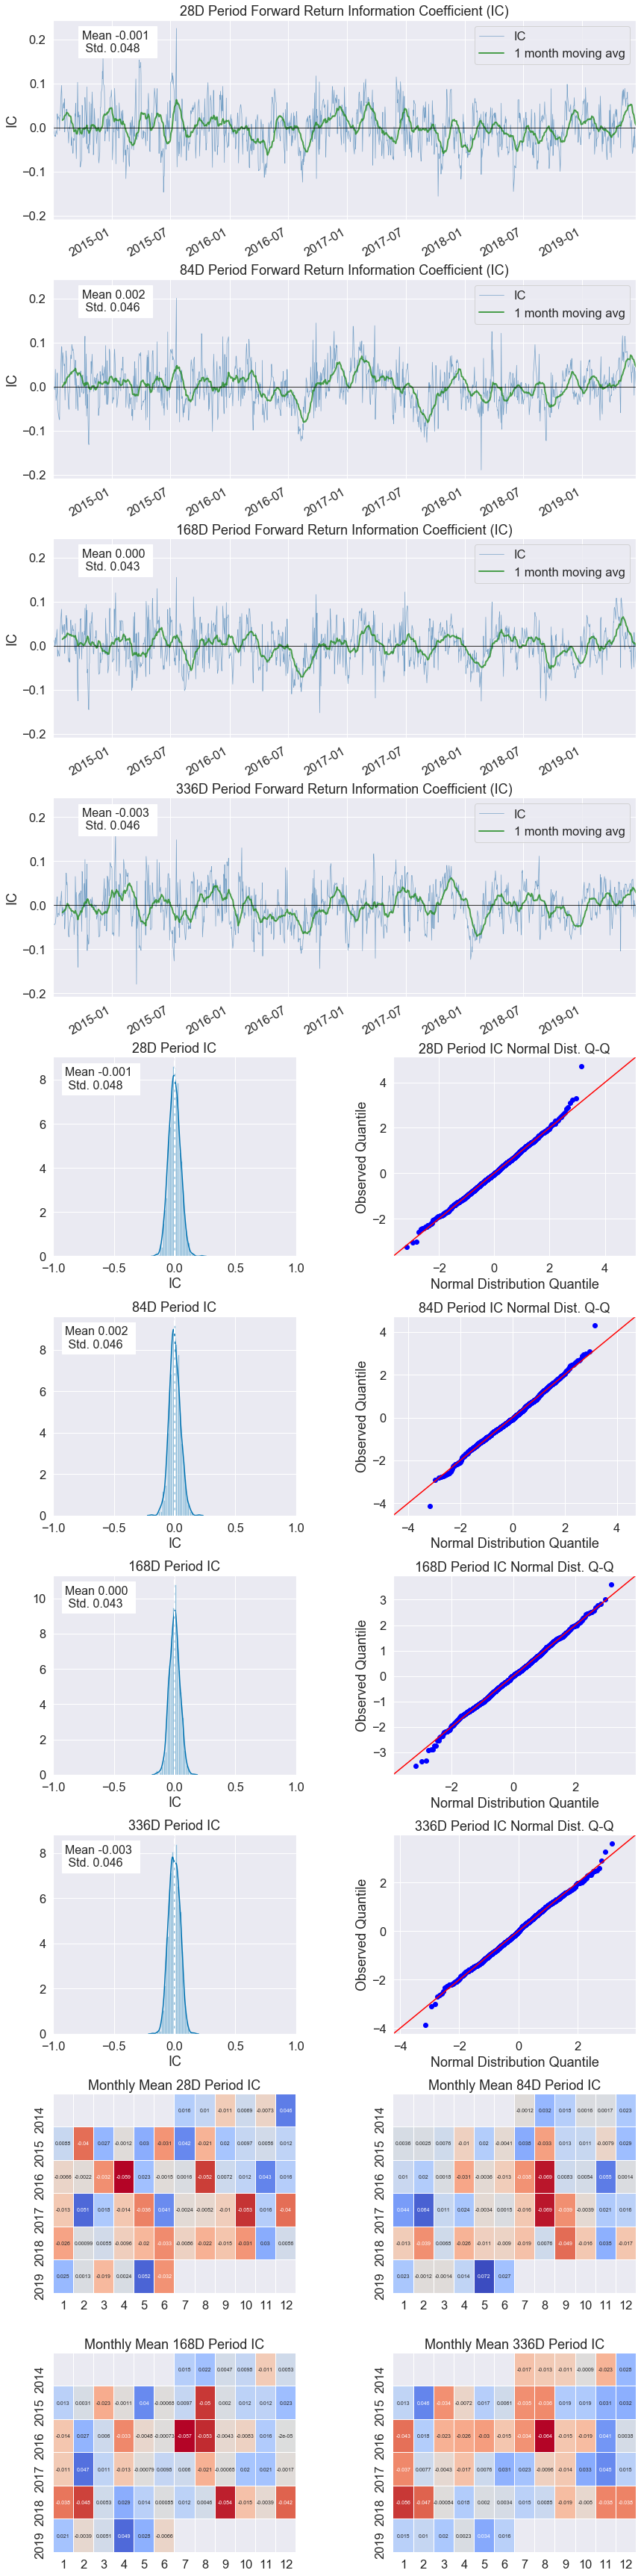

/Users/angli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


Turnover Analysis


,168D,28D,336D,84D
Quantile 1 Mean Turnover,0.806,0.744,0.801,0.802
Quantile 2 Mean Turnover,0.804,0.782,0.809,0.803
Quantile 3 Mean Turnover,0.806,0.789,0.805,0.802
Quantile 4 Mean Turnover,0.804,0.780,0.805,0.803
Quantile 5 Mean Turnover,0.808,0.742,0.803,0.800


,28D,84D,168D,336D
Mean Factor Rank Autocorrelation,0.102,0.002,-0.004,0.003


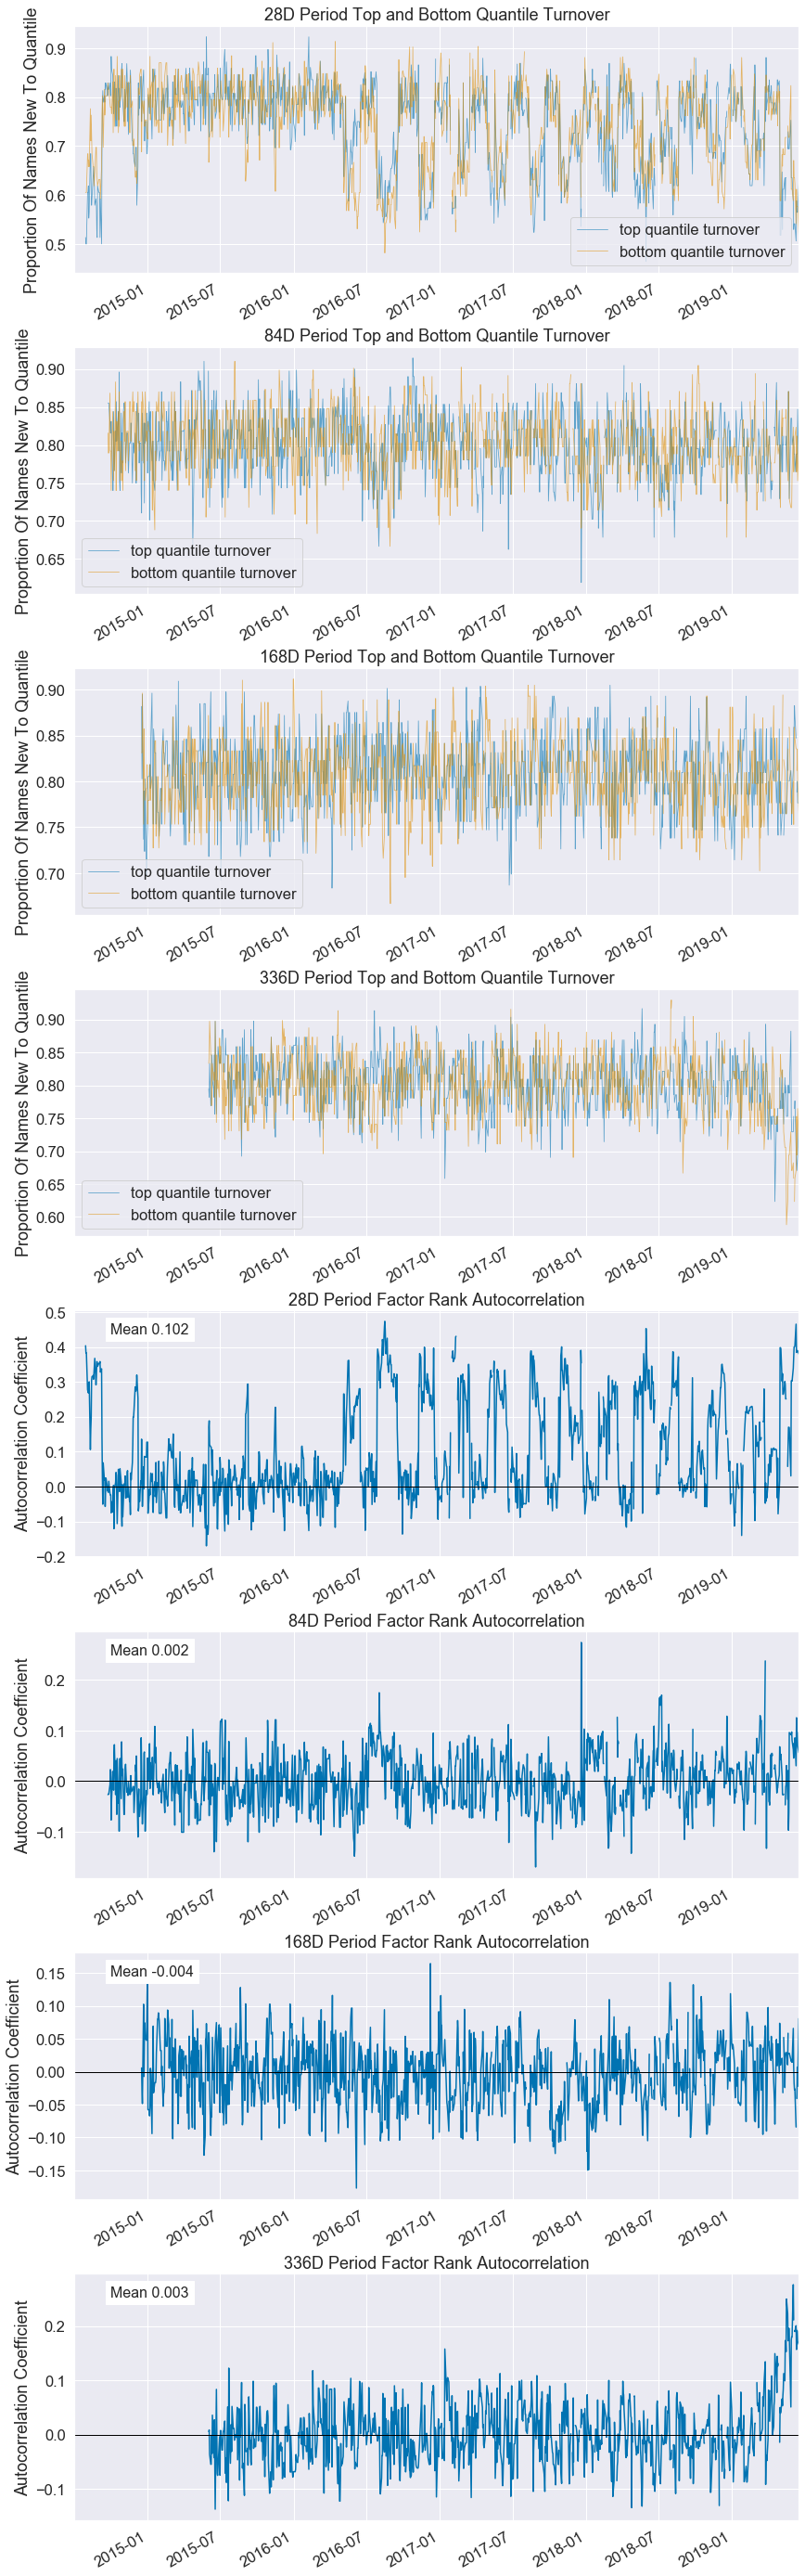

In [59]:
al.tears.create_full_tear_sheet(pred_al_fact, long_short=True, group_neutral=False, by_group=None)

In [ ]:
pf_returns, pf_positions, pf_benchmark = \
    al.performance.create_pyfolio_input(pred_al_fact,
                                        period='84D',
                                        capital=1000000,
                                        long_short=True,
                                        group_neutral=False,
                                        equal_weight=True,
                                        quantiles=[1,5],
                                        groups=None,
                                        benchmark_period='28D')

/Users/angli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,
/Users/angli/opt/anaconda3/lib/python3.7/site-packages/alphalens/performance.py:541: UserWarning: 'freq' not set, using business day calendar
  UserWarning)


In [ ]:
import pyfolio as pf
pf.tears.create_full_tear_sheet(pf_returns,
                                positions=pf_positions,
                                #benchmark_rets=pf_benchmark, # optional, default to SPY
                                hide_positions=True)